# Wordcloud sur haïkus

In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
os.chdir("C:/Users/maxim/Documents/ensae-python-2018/Data/")

In [3]:
base_haikus = pd.read_csv("haikus_scraping_v2_20181110.csv","|")

In [4]:
base_haikus.head()

,url,id_auteur,auteur,sexe,pays,haiku
0,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,quin-p,Philippe Quinta,H,France,"Fut-elle pleine\\déjà, elle décroit\\la lune"
1,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,py-d,Daniel Py,H,France,Lune parfaitement ronde\\Buée sur la vitre
2,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,alex-m,Marlène Alexa,F,Egypte,hiver\\dans les yeux de grand-mère\\une ombre ...
3,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,sang-r,Rahmatou Sangotte,F,France,ciel gris -\\une odeur d'oignons\\caramélisés
4,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,rais-c,Carol Raisfeld,F,USA,la fille du pasteur\\sa robe du dimanche\\de l...


In [5]:
len(base_haikus)

3477

In [5]:
base_haikus['haiku']

0            Fut-elle pleine\\déjà, elle décroit\\la lune
1              Lune parfaitement ronde\\Buée sur la vitre
2       hiver\\dans les yeux de grand-mère\\une ombre ...
3           ciel gris -\\une odeur d'oignons\\caramélisés
4       la fille du pasteur\\sa robe du dimanche\\de l...
5          Sans toi\\sous le ciel d'hiver\\nos pas perdus
6                petit noir -\\les cernes\\de la serveuse
7       Avant de partir,\\dans le miroir du salon\\tes...
8       brusques giboulées -\\pleurs et puis rires de ...
9       les mots sous les doigts\\l'aveugle et son liv...
10      les jours s'allongent\\même la gloire du matin...
11      sur mon smartphone\\le mont fuji au soleil cou...
12      l'orage s'éloigne -\\d'une fenêtre ouverte\\un...
13      nouvelle lune --\\la souris dans le grenier\\s...
14      encore errant\\dans le couloir vide --\\un par...
15      sortant du métro\\face à face avec la lune -\\...
16      j'oublie sa voix\\la lettre d'excuses de mon p...
17      journé

In [9]:
sum(base_haikus['sexe']=="F")

1057

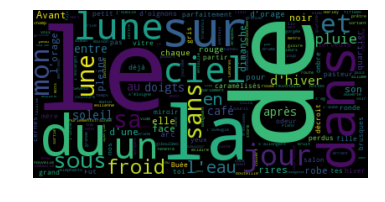

"0            Fut-elle pleine\\\\déjà, elle décroit\\\\la lune\n1              Lune parfaitement ronde\\\\Buée sur la vitre\n2       hiver\\\\dans les yeux de grand-mère\\\\une ombre ...\n3           ciel gris -\\\\une odeur d'oignons\\\\caramélisés\n4       la fille du pasteur\\\\sa robe du dimanche\\\\de l...\n5          Sans toi\\\\sous le ciel d'hiver\\\\nos pas perdus\n6                petit noir -\\\\les cernes\\\\de la serveuse\n7       Avant de partir,\\\\dans le miroir du salon\\\\tes...\n8       brusques giboulées -\\\\pleurs et puis rires de ...\n9       les mots sous les doigts\\\\l'aveugle et son liv...\n10      les jours s'allongent\\\\même la gloire du matin...\n11      sur mon smartphone\\\\le mont fuji au soleil cou...\n12      l'orage s'éloigne -\\\\d'une fenêtre ouverte\\\\un...\n13      nouvelle lune --\\\\la souris dans le grenier\\\\s...\n14      encore errant\\\\dans le couloir vide --\\\\un par...\n15      sortant du métro\\\\face à face avec la lune -\\\\...\n1

In [18]:
# Start with one review:
haikus = str(base_haikus["haiku"])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(haikus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
### Remove stopwords
import nltk

from nltk.corpus import stopwords
stopwords = set(stopwords.words('french'))

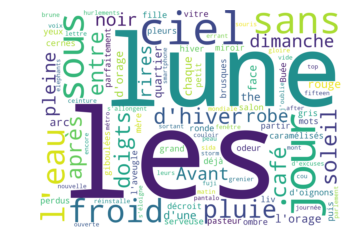

In [13]:
wordcloud2 = WordCloud(   stopwords=stopwords,
                          background_color='white',
                          width=2500,
                          height=1800, 
                        max_words=100, 
                         ).generate(haikus)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
haikus_F = str(base_haikus[base_haikus['sexe'] == "F"]["haiku"])
haikus_H = str(base_haikus[base_haikus['sexe'] == "H"]["haiku"])

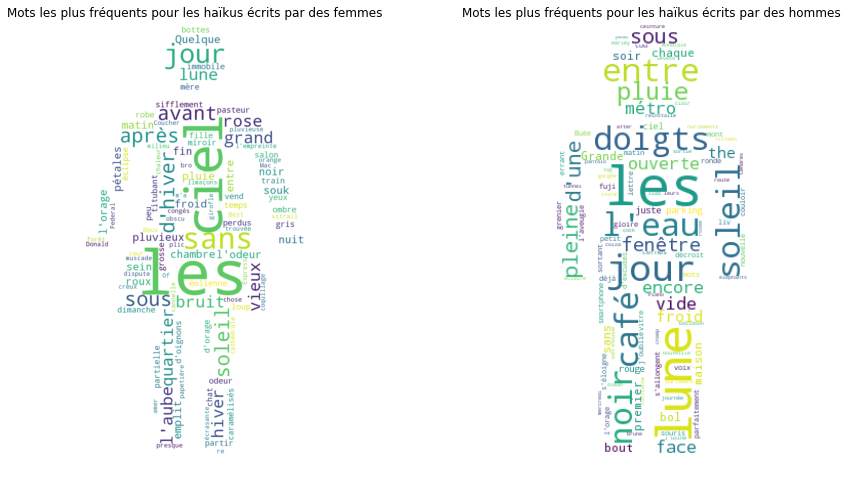

In [15]:
# Wordcloud pour les haikus écrits par des hommes et des femmes

# Pour les femmes
masqueF = np.array(Image.open("images/symbole-femme.png"))
wordcloud_femmes = WordCloud(stopwords=stopwords, 
                             background_color="white", 
                             #mode="RGBA", 
                             max_words=100, 
                             mask=masqueF).generate(haikus_F)

# Pour les hommes
masqueH = np.array(Image.open("images/symbole-man2.png"))
wordcloud_hommes = WordCloud(stopwords=stopwords, 
                             background_color="white", 
                             mode="RGBA", 
                             max_words=100, 
                             mask=masqueH).generate(haikus_H)
# Plot
# plt.figure(figsize=[7,7])
# Plot des graphes
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(wordcloud_femmes, interpolation="bilinear")
plt.axis("off")
plt.title("Mots les plus fréquents pour les haïkus écrits par des femmes")
ax2 = fig.add_subplot(1,2,2)
plt.imshow(wordcloud_hommes, interpolation="bilinear")
plt.axis("off")
plt.title("Mots les plus fréquents pour les haïkus écrits par des hommes")

# store to file
plt.savefig("images/wordcloud_v2_20181110.png", format="png")

In [46]:
#### Calage d'un premier modèle en ne conservant que les homes et les femmes
base_haikus_model = base_haikus[base_haikus.sexe != "?"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
               base_haikus_model['haiku'], base_haikus_model["sexe"])
len(base_haikus_model)

3404

In [47]:
## Création de la matrice document-terme avec le score tf-idf
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(), TfidfTransformer())

pipe.fit(X_train)
feat_train = pipe.transform(X_train)
feat_train.shape

C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(2553, 5470)

In [48]:
feat_test = pipe.transform(X_test)
feat_test.shape
## NB : moyen propre, on perd les mots qui sont dans X_test et pas dans X_train vu qu'on applique pipe (pas très grave).
# Le dictionnaire est constitué à partir du vocabulaire de X_train.

C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(851, 5470)

In [49]:
## Prédiction du sentiment avec une random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(feat_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [50]:
clf.score(feat_test, y_test)

0.6721504112808461

In [51]:
y_pred = clf.predict(feat_test)

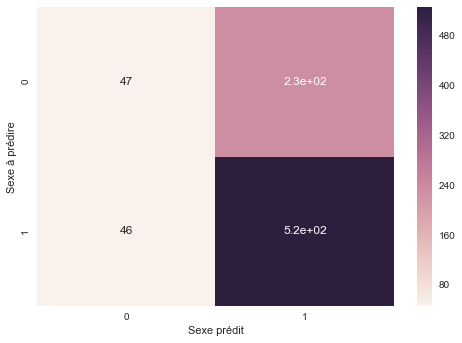

In [54]:
## Visualisation avec package sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sn
import matplotlib.pyplot as plt

matrice_a_tracer = pd.DataFrame(cnf_matrix)

plt.figure()
sn.heatmap(matrice_a_tracer, annot=True)
plt.xlabel("Sexe prédit")
plt.ylabel("Sexe à prédire")

In [ ]:
from sklearn.linear_model import LogisticRegression

# Pénalité L1 standard pour des modèles de régression logistique quand données textuelles
lreg = LogisticRegression(penalty= "l1")

# Entraînement modèle 
lreg.fit(X= dtm_train, y=fap[:2000])

# Prédiction globale
lreg.score(X=dtm_test, y=fap[2000:])
print(time.asctime())